# Generic Neural Network: Forward & Backward (Real Math)
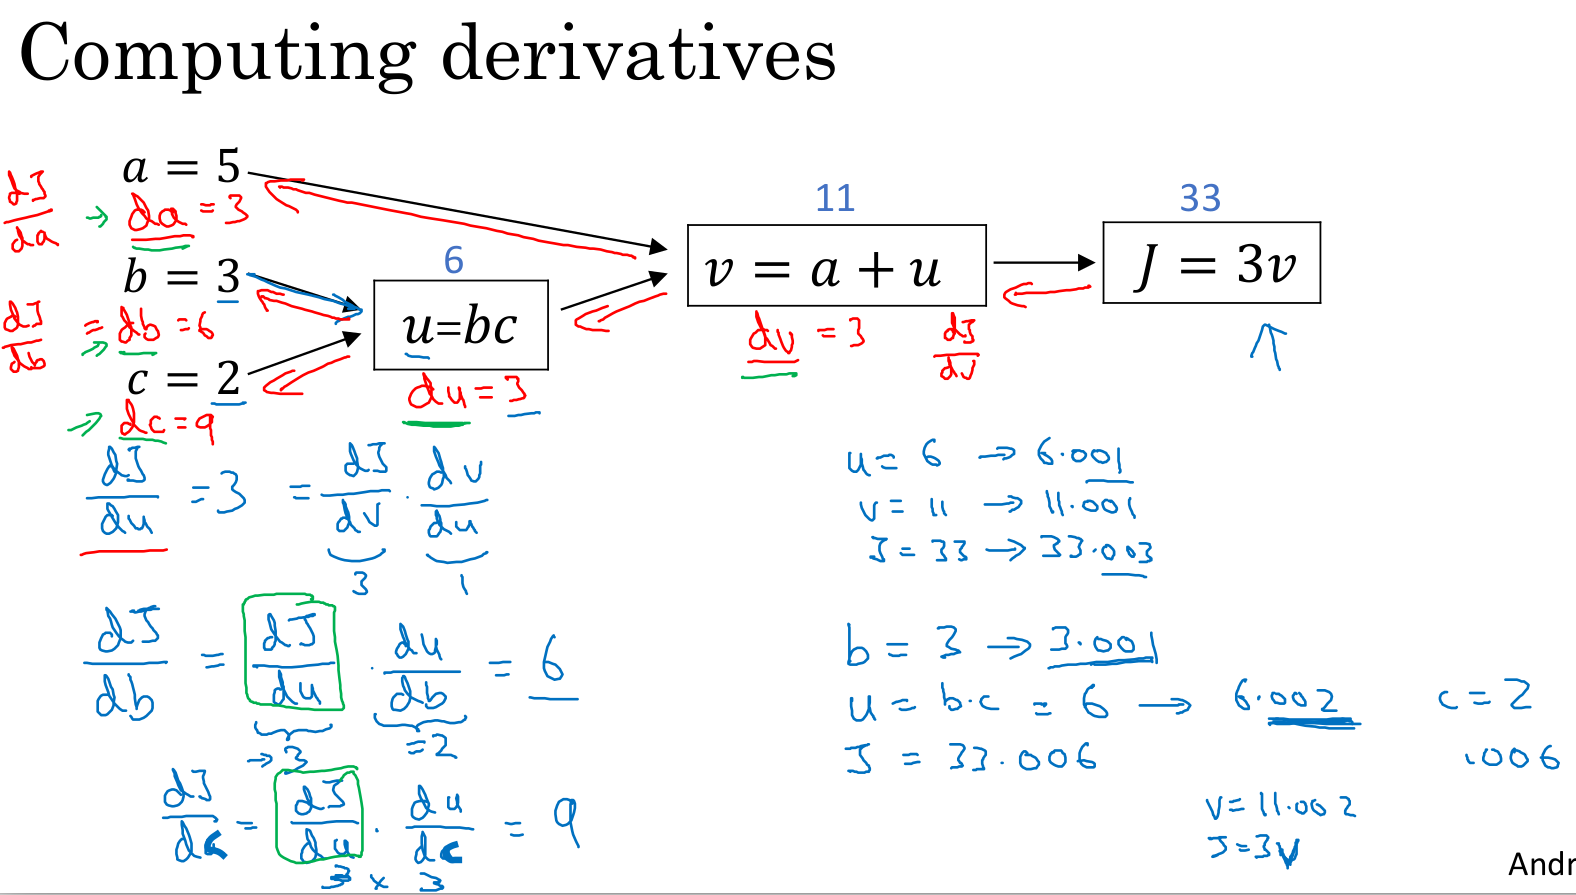

In [1]:
import numpy as np

class LogisticNeuron:
    def __init__(self):
        self.cache = {}

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def forward(self, w, b, X, Y):
        """
        Real Neural Network Steps:
        1. Linear: Z = wX + b
        2. Activation: A = Sigmoid(Z)
        3. Cost: Log Loss
        """
        # Step 1: Linear Computation
        Z = np.dot(w.T, X) + b
        
        # Step 2: Activation (Prediction)
        A = self.sigmoid(Z)
        
        # Step 3: Cost (Error)
        m = X.shape[1]
        cost = (-1/m) * np.sum(Y * np.log(A) + (1-Y) * np.log(1-A))
        
        # CACHE values for Backprop
        self.cache = {'X': X, 'A': A, 'Y': Y, 'm': m}
        
        print(f"Forward Complete. Cost: {cost:.5f}")
        return A, cost

    def backward(self):
        """
        Real Gradient Steps (Derived from Chain Rule):
        1. dZ = A - Y
        2. dw = X * dZ.T
        3. db = sum(dZ)
        """
        X = self.cache['X']
        A = self.cache['A']
        Y = self.cache['Y']
        m = self.cache['m']
        
        # 1. Gradient of Loss w.r.t Z (The "Error")
        # This is the simplified result of the Chain Rule for LogLoss + Sigmoid
        dZ = A - Y
        
        # 2. Gradient w.r.t Weights (dw)
        dw = (1/m) * np.dot(X, dZ.T)
        
        # 3. Gradient w.r.t Bias (db)
        db = (1/m) * np.sum(dZ)
        
        print(f"Backward Complete. dw shape: {dw.shape}, db: {db:.5f}")
        return {"dw": dw, "db": db}

# --- USAGE ---
# 1. Setup Data (3 features, 4 examples)
w = np.zeros((3, 1))
b = 0.0
X = np.random.randn(3, 4) # 3 Features, 4 Examples
Y = np.array([[1, 0, 1, 0]]) # 4 Labels

model = LogisticNeuron()

# 2. Forward Pass (Compute Cost)
A, cost = model.forward(w, b, X, Y)

# 3. Backward Pass (Compute Gradients)
grads = model.backward()
# Result: We now have dw and db to update our weights!

Forward Complete. Cost: 0.69315
Backward Complete. dw shape: (3, 1), db: 0.00000


In [2]:
X

array([[-0.42932332, -0.64350705,  1.64672373,  0.01334672],
       [ 0.23564302, -0.28057348, -0.49745125, -0.46120458],
       [-0.86650318,  1.2832279 ,  1.24335579, -2.16995879]])

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


# Deep Learning Data Structure: The Matrix X



## 1. The Structure (The "Why")
In this specific course notation, the matrix dimensions $(3, 4)$ mean:

* **3 Rows = 3 Features ($n_x$):**
    * Think of these as the **Attributes** or **Data Types** that describe an object.
    * Row 1: Pixel Red Intensity
    * Row 2: Pixel Green Intensity
    * Row 3: Pixel Blue Intensity
* **4 Columns = 4 Examples ($m$):**
    * Think of these as the **Distinct Objects** in your dataset.
    * Column 1: Image of a Cat
    * Column 2: Image of a Dog
    * Column 3: Image of a Bird
    * Column 4: Image of a Car

## 2. Visualizing the Matrix X
If we print the matrix $X$, it is organized like this:

$$
X = 
\begin{bmatrix} 
\text{Red}^{(1)} & \text{Red}^{(2)} & \text{Red}^{(3)} & \text{Red}^{(4)} \\
\text{Green}^{(1)} & \text{Green}^{(2)} & \text{Green}^{(3)} & \text{Green}^{(4)} \\
\text{Blue}^{(1)} & \text{Blue}^{(2)} & \text{Blue}^{(3)} & \text{Blue}^{(4)} 
\end{bmatrix}
$$

* **Reading Down (Vertical Column):** You get all the features (Red, Green, Blue) for **one single image**. This corresponds to the input vector $x^{(i)}$.
* **Reading Across (Horizontal Row):** You get the specific feature value (e.g., "Red Intensity") for **every image** in the entire dataset.